In this lesson, you'll focus on outliers as you continue learning about data cleaning. You might feel like you've already spent too much time on the tedious and boring topic of data cleaning. But rest assured that the importance of the data-cleaning phase can't be exaggerated enough—for any data science project! Even in this lesson, you're still immersed in the data-cleaning phase of the EDA process:

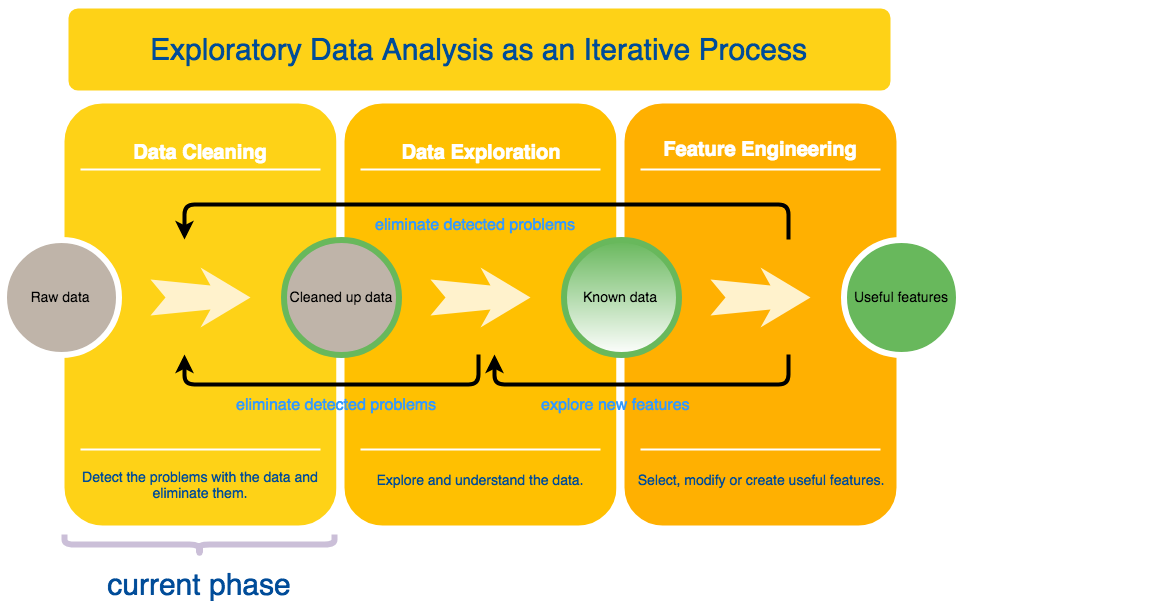
Another foundational issue in data cleaning is how to handle outliers. [According to Wikipedia](https://en.wikipedia.org/wiki/Outlier), an *outlier* is an observation point that is distant from other observations.

It's easy to understand what being "distant from other observations" means if you think in a two-dimensional space. For example, if you had a dataset of the net worth of the 7 billion people on earth, then the net worth of the richest 1,000 people would be visible outliers. Their net worth would be way higher than the rest.

In general, there are two ways to get outliers in the data:

- An error in the data collection process may create outliers. Take, for example, a *Salary* column in an Excel workbook where the values are stored in thousands. If you mistakenly type `100,000` instead of `100`, you would create an outlier due to error. That is more broadly called *measurement error*.
- Sometimes, the processes that generate the data produce extreme and rare values that can be considered true outliers. In this case, the abnormal data isn't due to measurement error but to the extreme nature of the observation itself. These cases should be rare.

In this lesson, the following topics will be covered:

* Why data scientists don't like outliers
* How to detect outliers
* How to treat outliers

Before proceeding further, note that outliers are defined for continuous variables and not for categorical ones. All discussion in this lesson, then, applies only to continuous variables.

# Do data scientists really dislike outliers?

Outliers can contain valuable information, and you shouldn't discard them without closely considering what is causing them. However, for data science models and applications, outliers can be a nuisance because of the following reasons:

* They skew the descriptive statistics of the data. For example, consider one of the most commonly used descriptive statistics—the mean. The value of the mean can be severely skewed by outliers.

* Some machine-learning models are sensitive to extreme values. In order to get more accurate estimates, you need to eliminate those values from your dataset.

To see the effects of outliers, watch the animation below. Pay attention to the orange line, which represents the relationship between the data points, and you'll see how an outlier can influence the relationship between the data points.

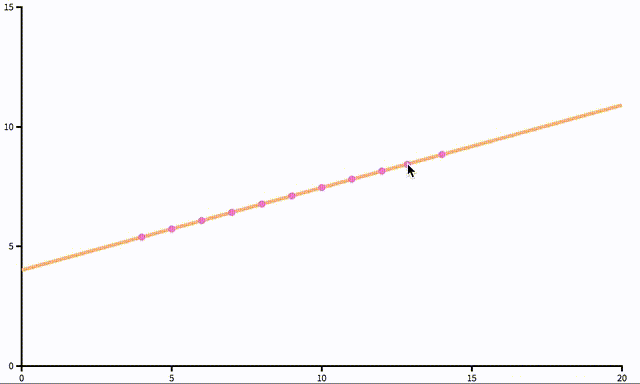


That being said, some tasks in data science are all about the outliers. For example, in anomaly detection, the main goal is to identify anomalies—which are often outliers themselves! This area of data science, however, is outside the scope of this program.

# Outlier detection

Detecting outliers, of course, is the first step to understanding how to handle them. But, just as with many of the previous tasks, there is no absolute standard to define what constitutes an outlier. When you talk about outliers, you should make sure that they are rare and have extreme values. Defining just *how* rare and *how* extreme they are is a judgment call that depends on the task at hand. In light of that, there are some commonly used thresholds for defining outliers.

Usually, you will use standard deviation to define the outliers. Values that reside outside the range of `(mean - T * standard deviation, mean + T * standard deviation)` are considered outliers. Here, $T$ stands for the threshold. Depending on the case, it's common to set the threshold to 1.5, 2, 3, or 5. But as mentioned earlier, the exact threshold value varies depending on the project in question.

You will now explore the two main methods of outlier detection:

- Visualize the variables.
- Use statistical techniques.

Although using statistical techniques is more scientific and reliable, visualizing the variables is easier. So you'll begin with the visualization.

## Visually detecting the outliers

Several common visualizations will help you identify extreme values in the data. Probably the most famous is the *box plot*. Box plots rest on *interquartile ranges* and feature *whiskers* on either end of the *box*. The points that lie beyond the whiskers are called *fliers* and are usually regarded as outliers. In Matplotlib, the whiskers by default reach to 1.5 times the standard deviation away from the first and the third quartiles. You can control this setting using the `whis` argument. Below, draw a box plot for the `Video views` variable from the YouTube dataset:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, text
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'youtube'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# youtube_df = pd.read_sql_query('select * from youtube',con=engine)
with engine.begin() as conn:
    query = text("""SELECT * FROM youtube""")
    youtube_df = pd.read_sql_query(query, conn)

# No need for an open connection,
# because you're only doing a single query
engine.dispose()

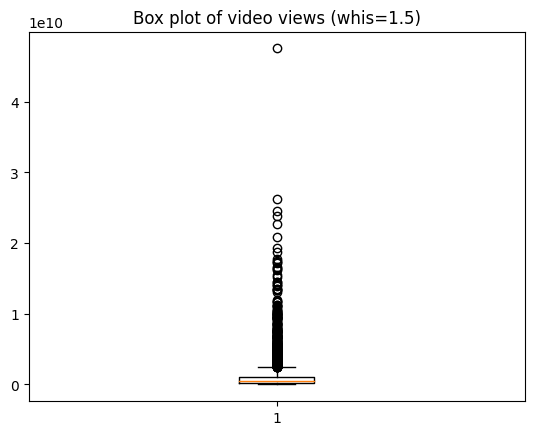

In [3]:
plt.boxplot(youtube_df["Video views"])
plt.title("Box plot of video views (whis=1.5)")
plt.show()

The resulting box is quite compressed and there seem to be a lot of outliers in the variable. So try adjusting your threshold to `whis=20`:

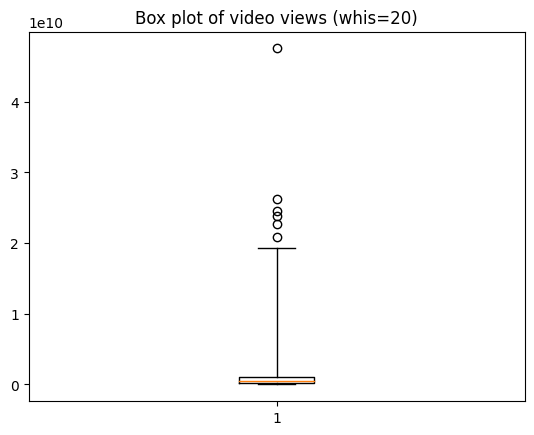

In [4]:
plt.boxplot(youtube_df["Video views"], whis=20)
plt.title("Box plot of video views (whis=20)")
plt.show()

The number of outliers decreased this time because the threshold is set quite high.

Another useful chart in detecting the outliers is the histogram. *Histograms* depict the distribution of the variables, and values that lie at extreme ends of the graph are potential outliers. Below, draw the histogram of the `Video views` variable:

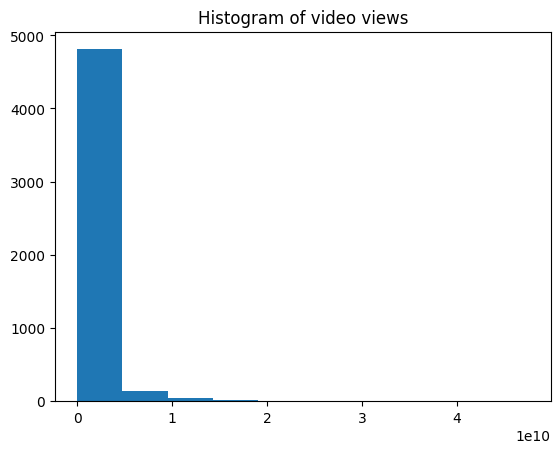

In [5]:
plt.hist(youtube_df["Video views"])
plt.title("Histogram of video views")
plt.show()

Here you can see that there are potential outliers on the right side of the range of the data.

Visualization is an easy and effective way to detect potential outliers. However, it is a subjective and imprecise investigation. Next, take a look at more formal statistical methods to detect outliers.

## Statistical methods to detect outliers



### The z-score

One statistic used to detect the outliers in a variable is the *z-score*. To calculate z-scores, you first scale the variable so that its mean is 0 and its standard deviation is 1. Then you can measure how far a value is far away from the mean (0) in terms of standard deviations (1). The bigger the z-score of a value, the farther it is from the mean and the more likely that it is an outlier. However, you still need to set a threshold for what z-score constitutes an outlier.

Using the code below, calculate the z-scores of the `Video views` variable with SciPy's `zscore()` function. Set four different threshold values—1, 2, 3, and 4—and note how that changes how many outliers are identified.

In [6]:
from scipy.stats import zscore

z_scores = zscore(youtube_df["Video views"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,   11,
         13,   14,   15,   16,   18,   19,   21,   22,   25,   26,   27,
         35,   37,   38,   39,   40,   41,   42,   43,   44,   46,   47,
         48,   49,   50,   51,   52,   53,   54,   57,   58,   59,   61,
         62,   63,   64,   66,   67,   68,   70,   72,   74,   75,   77,
         78,   81,   82,   83,   84,   85,   87,   88,   91,   93,   95,
         98,   99,  105,  106,  111,  112,  113,  114,  116,  120,  121,
        122,  123,  125,  126,  127,  130,  131,  135,  137,  138,  143,
        145,  146,  147,  149,  151,  154,  155,  158,  165,  167,  170,
        171,  172,  174,  176,  182,  184,  187,  193,  198,  200,  201,
        208,  210,  212,  218,  224,  227,  228,  229,  241,  242,  244,
        245,  248,  249,  254,  256,  257,  260,  261,  264,  265,  266,
        268,  269,  270,  271,  273,  277,  282,  283,  284,  287,  

As you can see, the number of outliers decreases as the threshold for the z-scores increases.

### Tukey's method

*Tukey's method* is also known as the interquartile range (IQR) method. You already saw this method in action when you learned about box plots.

As mentioned earlier, the IQR is the range between the first and the third quartiles. This method considers outliers to be all values that are outside the threshold of 1.5 times the IQR. However, you can change this threshold to other values.

Using 1, 1.5, 2 ... 4.5 as the threshold values, find out the number of outliers in the `Video views` variable using Tukey's method:

In [7]:
# NumPy's `percentile()` method returns the
# values of the given percentiles. In this case,
# give `75` and `25` as parameters, which corresponds
# to the third and the first quartiles.
q75, q25 = np.percentile(youtube_df["Video views"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((youtube_df["Video views"] > max_val)
                      | (youtube_df["Video views"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 624
The score threshold is: 1.5
Number of outliers is: 475
The score threshold is: 2.0
Number of outliers is: 371
The score threshold is: 2.5
Number of outliers is: 296
The score threshold is: 3.0
Number of outliers is: 242
The score threshold is: 3.5
Number of outliers is: 209
The score threshold is: 4.0
Number of outliers is: 182
The score threshold is: 4.5
Number of outliers is: 151


# How to treat outliers

You've detected the outliers—now what? You need to do something with them so that they do not affect the reliability of your analysis. Broadly speaking, there are three approaches that you can take in handling outliers:

- You can **drop the outliers** from your dataset.

- You can **cap the values of the outliers** by assigning them new values.

- You can **transform the outliers** into something harmless for your analysis.

Below, explore each approach one by one.

## Dropping outliers from the dataset

The easiest way to handle outliers is probably to drop the observations with extreme values. But consider the discussion from the previous lesson about dropping missing values: by excluding any observations from the dataset, you effectively lose information. This is also true for dropping outliers, especially in small datasets. However, some situations may justify dropping the outliers from the dataset:

* If you know that the outliers stem from measurement error or a problem in the data-collection process, you should drop them.

* If dropping the outliers doesn't make any meaningful change in the following phases of analysis, you can drop them. However, to confirm this, you need to replicate your analysis, both with the outliers and without them.

* If dropping the outliers makes a meaningful change in the following phases, but you can't find a proper way of handling them otherwise, you can drop them from your dataset.

## Capping the values of the outliers

The main problem with the outliers stems from their extreme magnitudes. If you can cap the values of the outliers, that limits their effects on your analysis. One way to visualize the effectiveness of removing outlier values is called *winsorization*. Winsorization can be applied in one-way or two-way techniques. In *one-way winsorization*, you  limit either the lowest end or the highest end of the value distribution. And in *two-way winsorization*, you set limits on both the lowest end and the highest end.

The idea in winsorization is to set the values of the extreme points to the value of a specified percentile. For example, you may set the values of the highest end of the distribution to the value of the ninety-fifth percentile. Similarly, you can set the values of the lowest end to the value of the fifth percentile. This can help give you a better representation of the dataset because the mean and standard deviation can be sensitive to extreme values.

You can winsorize a variable using SciPy's `winsorize()` method. To do so, give a tuple of values as a parameter to this method, where the first element of the tuple is the lowest percentile, and the second element is the highest percentile in the two-way winsorization. If you want to apply one-way winsorization, you can set the corresponding element in this tuple to 0. Below, winsorize the `Video views` variable:

In [8]:
from scipy.stats.mstats import winsorize

# Apply one-way winsorization to the highest end
# of the value distribution. Because you have a lot of extreme
# values, set the values of the outliers to the
# value of the ninetieth percentile.
winsorized_views = winsorize(youtube_df["Video views"], (0, 0.10))

winsorized_views

masked_array(data=[2468241402, 2468241402, 2468241402, ...,  311758426,
                     14563764,   73312511],
             mask=False,
       fill_value=999999)

Then you can visualize the winsorized data using a box plot, as shown below:

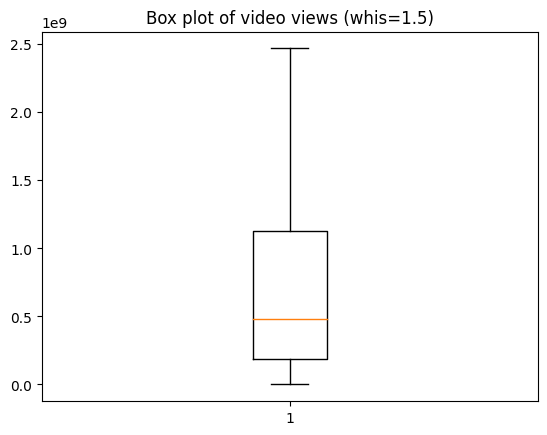

In [9]:
plt.boxplot(winsorized_views)
plt.title("Box plot of video views (whis=1.5)")
plt.show()

As you can see, the box plot reveals no outliers after winsorization.

## Transforming outliers



Another common way of dealing with outliers is to transform the variable. Transformation helps not only with outliers but also with variables that are not normally distributed. When transforming the variable, you'll usually apply *monotonic transformations*, which are transformations that don't change the relative ordering of the values in a variable. Two common monotonic transformations in data science are *log transformations* and *square-root transformations*.

In log transformation, each variable value $x$ is replaced with the natural log of $x$. As a reminder, the natural logarithm of $x$ is the power to which the mathematical constant $e$ (which is about `2.718`) would have to be raised to equal $x$. For example, $\log(7.5) = 2.0149$, because $e^{2.019} = 7.5$. Therefore, the data will be shifted where the near-zero values will be de-emphasized.

This allows you to potentially obtain a bell-shaped distribution. Take a look at a simple example array to see the effect of a log transformation:

In [10]:
m = np.array([1,2,3,4,0,9])
print(m)

[1 2 3 4 0 9]


In [11]:
from numpy import inf
x = np.log(m)
x[x == -inf] = 0
print(x)

[0.         0.69314718 1.09861229 1.38629436 0.         2.19722458]


As you can see, you start with the array $m$, where the values range from 0-3. Then you apply the transformation, and the values of both `0` and `1` are transformed to zero and the bigger values of `2` and `3` are revalued in a nonlinear way.

To see the effect of log transformation on the `Video views` variable, look at the histogram of the original variable and the log-transformed version:

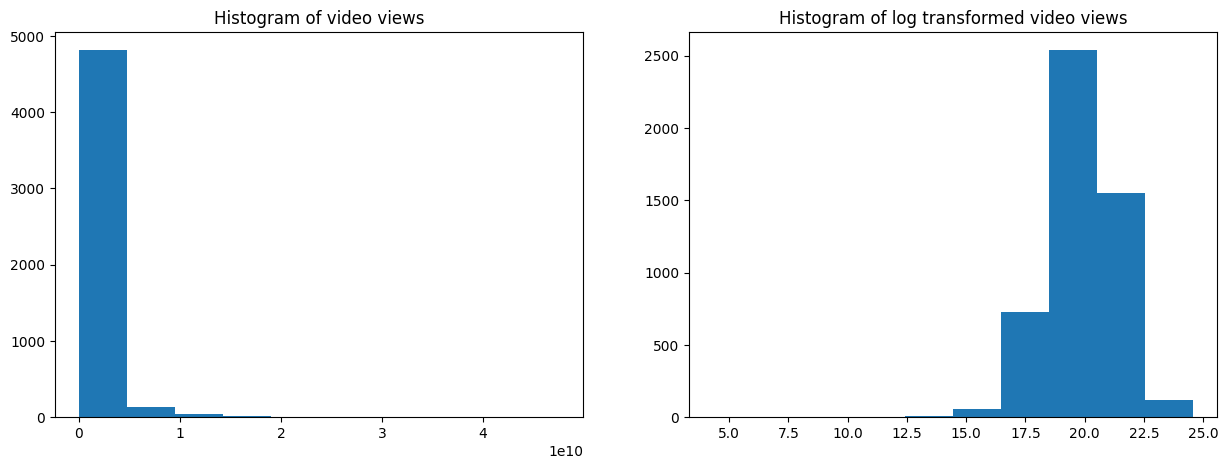

In [12]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(youtube_df["Video views"])
plt.title("Histogram of video views")

plt.subplot(1,2,2)
plt.hist(np.log(youtube_df["Video views"]))
plt.title("Histogram of log transformed video views")
plt.show()

As you can see, the log-transformed variable more closely matches a normal distribution. This will help you apply statistical techniques for future analysis. But for now, look at the box plots of the original variable and its log-transformed variant to see whether log transformation has an effect on the outliers.

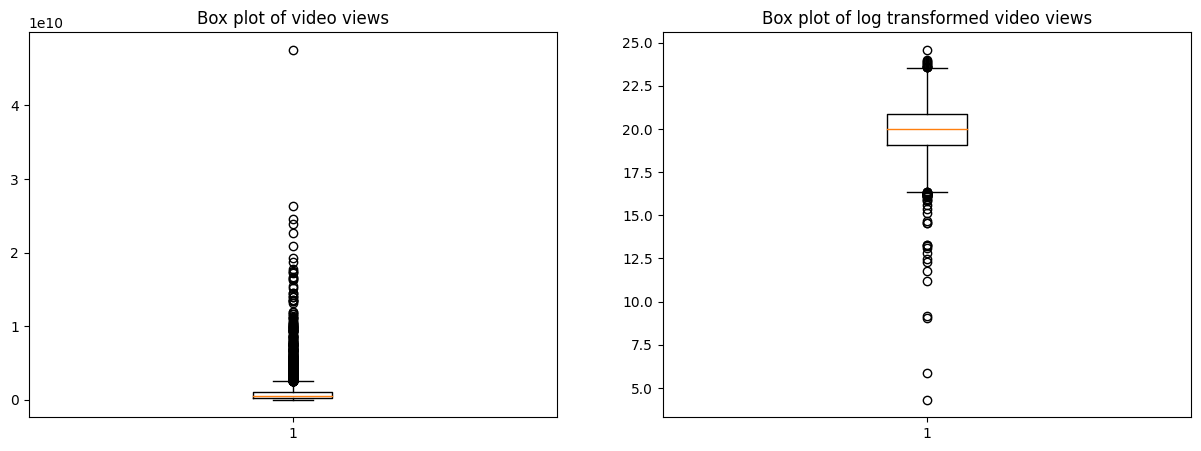

In [13]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(youtube_df["Video views"])
plt.title("Box plot of video views")

plt.subplot(1,2,2)
plt.boxplot(np.log(youtube_df["Video views"]))
plt.title("Box plot of log transformed video views")
plt.show()

The chart on the right demonstrates that log transformation has narrowed the range of values. The outliers that lie beyond the whiskers are now different than the ones on the left chart.

Next, apply Tukey's method to see if the number of outliers has decreased:

In [14]:
# Take the log of the video views and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(youtube_df["Video views"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(youtube_df["Video views"]) > max_val)
                      | (np.log(youtube_df["Video views"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 326
The score threshold is: 1.5
Number of outliers is: 58
The score threshold is: 2.0
Number of outliers is: 19
The score threshold is: 2.5
Number of outliers is: 14
The score threshold is: 3.0
Number of outliers is: 13
The score threshold is: 3.5
Number of outliers is: 8
The score threshold is: 4.0
Number of outliers is: 6
The score threshold is: 4.5
Number of outliers is: 4


The number of outliers decreased dramatically after the log transformation.